In [1]:
import pandas as pd
import yfinance as yf
from datetime import timedelta
import pandas_ta as ta


In [2]:
tickers = ['TSLA', 'RIVN', 'NVDA','AAPL']
years = 5

In [3]:
def data_download_daily(tickers, years):
    today = pd.Timestamp.today()
    days_in_years = 365*years
    start_date = (today - timedelta(days=days_in_years)).strftime('%Y-%m-%d')
    end_date = today
    days_in_years = 365*years
    prices_df = pd.DataFrame()
    for ticker in tickers:
        data = yf.download(ticker, start = start_date, end= end_date, interval='1D')
        prices_df[ticker] = data['Adj Close']
    return prices_df


In [4]:
prices_df = data_download_daily(tickers=tickers, years=years)
prices_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,RIVN,NVDA,AAPL
Date,,,,
2019-03-05 00:00:00-05:00,18.436001,NaN,38.866077,42.245636
2019-03-06 00:00:00-05:00,18.416000,NaN,37.756107,42.002548
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063316,41.516392
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405983,41.615067
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056705
...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,10.70,790.919983,181.160004
2024-02-27 00:00:00-05:00,199.729996,11.14,787.010010,182.630005
2024-02-28 00:00:00-05:00,202.039993,11.30,776.630005,181.419998


In [5]:
def calculate_my_strategy(input_df):
    strat = input_df.copy()
    for ticker in input_df.columns:
        strat[ticker + '_upper_50'] =   strat[ticker].rolling(window = 45).mean() + abs(strat[ticker].rolling(window = 90).mean())*0.5
        strat[ticker + '_lower_50'] =   strat[ticker].rolling(window = 45).mean() - abs(strat[ticker].rolling(window = 90).mean())*0.5
        strat[ticker + '_rolling_50'] = strat[ticker].rolling(window = 50).mean()
    return strat

In [6]:
my_strat = calculate_my_strategy(prices_df)
my_strat

,TSLA,RIVN,NVDA,AAPL,TSLA_upper_50,TSLA_lower_50,TSLA_rolling_50,RIVN_upper_50,RIVN_lower_50,RIVN_rolling_50,NVDA_upper_50,NVDA_lower_50,NVDA_rolling_50,AAPL_upper_50,AAPL_lower_50,AAPL_rolling_50
Date,,,,,,,,,,,,,,,,
2019-03-05 00:00:00-05:00,18.436001,NaN,38.866077,42.245636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-06 00:00:00-05:00,18.416000,NaN,37.756107,42.002548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063316,41.516392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405983,41.615067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,10.70,790.919983,181.160004,323.292389,101.811611,216.3596,26.170833,8.609611,17.9130,876.655810,341.409520,597.131199,280.640365,94.477495,188.507294
2024-02-27 00:00:00-05:00,199.729996,11.14,787.010010,182.630005,321.932611,101.064278,215.5684,25.854611,8.390722,17.7422,885.385081,346.275806,603.253799,280.407764,94.178910,188.205740
2024-02-28 00:00:00-05:00,202.039993,11.30,776.630005,181.419998,320.541055,100.124277,214.5882,25.544000,8.155556,17.5196,893.727454,350.676989,609.116399,280.152139,93.856228,187.876989


In [7]:
#input dataframe has to have tickers and column names whoch contain daily pices 
def calculate_donchian(prices_df):
    donchian_df = pd.DataFrame(index=prices_df.index)  # DataFrame to store Donchian channels
    for ticker in prices_df.columns:
        donchian_df[[f"{ticker}_dcl",f"{ticker}_dcm", f"{ticker}_dcu"]] = prices_df.ta.donchian(high = prices_df[ticker], low = prices_df[ticker], lower_length = 40, upper_length = 40)
        donchian_df[f'{ticker}_upper_dcu'] = donchian_df[f'{ticker}_dcu'] - (donchian_df[f'{ticker}_dcu'] - donchian_df[f'{ticker}_dcm'])*0.3
        donchian_df[f'{ticker}_lower_dcl'] = donchian_df[f'{ticker}_dcl'] + (donchian_df[f'{ticker}_dcm'] - donchian_df[f'{ticker}_dcl'])*0.3

    return donchian_df

In [8]:
donchian_df = calculate_donchian(prices_df)
donchian_df.tail(5)

,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,RIVN_dcl,RIVN_dcm,RIVN_dcu,RIVN_upper_dcu,RIVN_lower_dcl,NVDA_dcl,NVDA_dcm,NVDA_dcu,NVDA_upper_dcu,NVDA_lower_dcl,AAPL_dcl,AAPL_dcm,AAPL_dcu,AAPL_upper_dcu,AAPL_lower_dcl
Date,,,,,,,,,,,,,,,,,,,,
2024-02-26 00:00:00-05:00,181.059998,217.119995,253.179993,242.361993,191.877997,10.07,16.805000,23.540001,21.519501,12.0905,475.690002,633.304993,790.919983,743.635486,522.974500,180.949097,187.940178,194.931259,192.833935,183.046421
2024-02-27 00:00:00-05:00,181.059998,214.769997,248.479996,238.366996,191.172997,10.07,16.764999,23.459999,21.451499,12.0785,475.690002,633.304993,790.919983,743.635486,522.974500,180.949097,187.940178,194.931259,192.833935,183.046421
2024-02-28 00:00:00-05:00,181.059998,214.739998,248.419998,238.315998,191.163998,10.07,15.585000,21.100000,19.445500,11.7245,475.690002,633.304993,790.919983,743.635486,522.974500,180.949097,187.940178,194.931259,192.833935,183.046421
2024-02-29 00:00:00-05:00,181.059998,210.754997,240.449997,231.541497,189.968497,10.07,15.195000,20.320000,18.782500,11.6075,475.690002,633.404999,791.119995,743.805496,523.004501,180.750000,187.840630,194.931259,192.804070,182.877189
2024-03-01 00:00:00-05:00,181.059998,210.754997,240.449997,231.541497,189.968497,10.07,14.825000,19.580000,18.153500,11.4965,479.980011,651.384995,822.789978,771.368483,531.401506,179.660004,187.295631,194.931259,192.640571,181.950692


In [9]:
prices_df

,TSLA,RIVN,NVDA,AAPL
Date,,,,
2019-03-05 00:00:00-05:00,18.436001,NaN,38.866077,42.245636
2019-03-06 00:00:00-05:00,18.416000,NaN,37.756107,42.002548
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063316,41.516392
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405983,41.615067
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056705
...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,10.70,790.919983,181.160004
2024-02-27 00:00:00-05:00,199.729996,11.14,787.010010,182.630005
2024-02-28 00:00:00-05:00,202.039993,11.30,776.630005,181.419998


In [10]:
def backtest(reference, ticker, trades):
    max_drawdown=0
    longest_hold=0
    shortest_hold=0
    average_drawdown=0
    max_gain=0
    total_gain= 0

My strategy

In [11]:
merge = pd.merge(prices_df, donchian_df, how='left', left_index=True, right_index=True)
merge

,TSLA,RIVN,NVDA,AAPL,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,RIVN_dcl,...,NVDA_dcl,NVDA_dcm,NVDA_dcu,NVDA_upper_dcu,NVDA_lower_dcl,AAPL_dcl,AAPL_dcm,AAPL_dcu,AAPL_upper_dcu,AAPL_lower_dcl
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-05 00:00:00-05:00,18.436001,NaN,38.866077,42.245636,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-06 00:00:00-05:00,18.416000,NaN,37.756107,42.002548,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063316,41.516392,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405983,41.615067,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056705,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,10.70,790.919983,181.160004,181.059998,217.119995,253.179993,242.361993,191.877997,10.07,...,475.690002,633.304993,790.919983,743.635486,522.974500,180.949097,187.940178,194.931259,192.833935,183.046421
2024-02-27 00:00:00-05:00,199.729996,11.14,787.010010,182.630005,181.059998,214.769997,248.479996,238.366996,191.172997,10.07,...,475.690002,633.304993,790.919983,743.635486,522.974500,180.949097,187.940178,194.931259,192.833935,183.046421
2024-02-28 00:00:00-05:00,202.039993,11.30,776.630005,181.419998,181.059998,214.739998,248.419998,238.315998,191.163998,10.07,...,475.690002,633.304993,790.919983,743.635486,522.974500,180.949097,187.940178,194.931259,192.833935,183.046421


1. if lower donchian indicator is crossed from bottom hold until it crosses donchian upper indicator
2. if upper donchian indicator is crossed from the top, hold until its crossed from below the lower donchian indicator 

long position column where it says true if open position is opened

short position column where it says true if short postion is opened 

obviously both of them are opened as long as they are not closed 

for my case when one is closed second is opened

longest position is when you have the most consecutive true values for either of those columns

biggest drawdown is when you have the biggest difference form the last highest position in the position, if it dips after peaking during long position or peaks after dipin during a short position

average drawdown is sum of all drawdowns devided by the sum of drawdowns (non 0 values in drawdown column)

max gain and average gain is the opposite of drawdowns

all of these need separate columns

In [12]:
backtest_df = merge.copy()

In [13]:
backtest_df

,TSLA,RIVN,NVDA,AAPL,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,RIVN_dcl,...,NVDA_dcl,NVDA_dcm,NVDA_dcu,NVDA_upper_dcu,NVDA_lower_dcl,AAPL_dcl,AAPL_dcm,AAPL_dcu,AAPL_upper_dcu,AAPL_lower_dcl
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-05 00:00:00-05:00,18.436001,NaN,38.866077,42.245636,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-06 00:00:00-05:00,18.416000,NaN,37.756107,42.002548,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063316,41.516392,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405983,41.615067,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056705,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,10.70,790.919983,181.160004,181.059998,217.119995,253.179993,242.361993,191.877997,10.07,...,475.690002,633.304993,790.919983,743.635486,522.974500,180.949097,187.940178,194.931259,192.833935,183.046421
2024-02-27 00:00:00-05:00,199.729996,11.14,787.010010,182.630005,181.059998,214.769997,248.479996,238.366996,191.172997,10.07,...,475.690002,633.304993,790.919983,743.635486,522.974500,180.949097,187.940178,194.931259,192.833935,183.046421
2024-02-28 00:00:00-05:00,202.039993,11.30,776.630005,181.419998,181.059998,214.739998,248.419998,238.315998,191.163998,10.07,...,475.690002,633.304993,790.919983,743.635486,522.974500,180.949097,187.940178,194.931259,192.833935,183.046421


In [14]:
def donchian_check(tickers, input_df):
    column_1 = '_lower_dcl'
    column_2 = '_upper_dcu'
    backtest_df = input_df.copy()
    for ticker in tickers:
        for date in backtest_df.index:
        # Skip the first date as there is no previous date
            if date == backtest_df.index[0]:
                continue
            
            # Get the index location for the current date
            i = backtest_df.index.get_loc(date)
            
            if backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] > backtest_df[ticker + column_1].iloc[i]:
                backtest_df.at[date, ticker +'_long_pos'] = 'open_long_position'
            elif backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] < backtest_df[ticker + column_2].iloc[i]:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
            if backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] > backtest_df[ticker + column_1].iloc[i]:
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
            elif backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] < backtest_df[ticker + column_2].iloc[i]:
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
    return backtest_df

In [15]:
donchian_df = donchian_check(tickers, backtest_df)
donchian_df

,TSLA,RIVN,NVDA,AAPL,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,RIVN_dcl,...,AAPL_upper_dcu,AAPL_lower_dcl,TSLA_long_pos,TSLA_short_pos,RIVN_long_pos,RIVN_short_pos,NVDA_long_pos,NVDA_short_pos,AAPL_long_pos,AAPL_short_pos
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-05 00:00:00-05:00,18.436001,NaN,38.866077,42.245636,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-06 00:00:00-05:00,18.416000,NaN,37.756107,42.002548,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063316,41.516392,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405983,41.615067,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056705,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,10.70,790.919983,181.160004,181.059998,217.119995,253.179993,242.361993,191.877997,10.07,...,192.833935,183.046421,open_long_position,close_short_position,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-27 00:00:00-05:00,199.729996,11.14,787.010010,182.630005,181.059998,214.769997,248.479996,238.366996,191.172997,10.07,...,192.833935,183.046421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-28 00:00:00-05:00,202.039993,11.30,776.630005,181.419998,181.059998,214.739998,248.419998,238.315998,191.163998,10.07,...,192.833935,183.046421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# def create_gains_df(tickers, input_df):
#     gains_df = pd.DataFrame()
#     for ticker in tickers:
#         temporary = input_df[(input_df[f'{ticker}_long_pos'].str.contains('position', na=False)) | 
#                     (input_df[f'{ticker}_short_pos'].str.contains('position', na=False))][[ticker, f'{ticker}_long_pos', f'{ticker}_short_pos']]
#         gains_df = pd.concat([gains_df, temporary])
#     return gains_df

In [17]:
# gains_df = create_gains_df(tickers, donchian_df)
# gains_df

In [18]:
temp_df = donchian_df.filter(regex='TSLA')
temp_df

,TSLA,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,TSLA_long_pos,TSLA_short_pos
Date,,,,,,,,
2019-03-05 00:00:00-05:00,18.436001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-06 00:00:00-05:00,18.416000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-07 00:00:00-05:00,18.439333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-11 00:00:00-04:00,19.394667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,181.059998,217.119995,253.179993,242.361993,191.877997,open_long_position,close_short_position
2024-02-27 00:00:00-05:00,199.729996,181.059998,214.769997,248.479996,238.366996,191.172997,NaN,NaN
2024-02-28 00:00:00-05:00,202.039993,181.059998,214.739998,248.419998,238.315998,191.163998,NaN,NaN


In [19]:
temporary_df = pd.DataFrame()
temporary_df = donchian_df.filter(regex = 'TSLA')
long_position = False
open_date_long = []
close_date_long = []
open_price_long = []
close_price_long = []
results_long = pd.DataFrame()
results_short = pd.DataFrame()
#create lists of positions to be able to track and summerize them
temporary_df['TSLA_long_pos']  = temporary_df['TSLA_long_pos'].astype(str)
#first calculate long positions
for date, row in temporary_df.iterrows():
        print(date, row)
        if long_position == False and 'open' in row['TSLA_long_pos']:
                open_date_long.append(date)
                open_price_long.append(row['TSLA'])
                long_position = True
        if long_position == True and 'close' in row['TSLA_long_pos']:
                close_date_long.append(date)
                close_price_long.append(row['TSLA'])
                long_position = False

/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_66131/1266625282.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporary_df['TSLA_long_pos']  = temporary_df['TSLA_long_pos'].astype(str)


2019-03-05 00:00:00-05:00 TSLA              18.436001
TSLA_dcl                NaN
TSLA_dcm                NaN
TSLA_dcu                NaN
TSLA_upper_dcu          NaN
TSLA_lower_dcl          NaN
TSLA_long_pos           nan
TSLA_short_pos          NaN
Name: 2019-03-05 00:00:00-05:00, dtype: object
2019-03-06 00:00:00-05:00 TSLA              18.416
TSLA_dcl             NaN
TSLA_dcm             NaN
TSLA_dcu             NaN
TSLA_upper_dcu       NaN
TSLA_lower_dcl       NaN
TSLA_long_pos        nan
TSLA_short_pos       NaN
Name: 2019-03-06 00:00:00-05:00, dtype: object
2019-03-07 00:00:00-05:00 TSLA              18.439333
TSLA_dcl                NaN
TSLA_dcm                NaN
TSLA_dcu                NaN
TSLA_upper_dcu          NaN
TSLA_lower_dcl          NaN
TSLA_long_pos           nan
TSLA_short_pos          NaN
Name: 2019-03-07 00:00:00-05:00, dtype: object
2019-03-08 00:00:00-05:00 TSLA              18.942667
TSLA_dcl                NaN
TSLA_dcm                NaN
TSLA_dcu               

1. can define a function for one and just reapeat for every ticker
2. figure out if i want to return multiple dataframes or find a way to return results for multiple tickers


In [30]:
def bbacktest(tickers, backtest_df):
        #iterate through tickers
        # Assuming your DataFrame is called 'temporary_df'
        for ticker in tickers:
                temporary_df = pd.DataFrame()
                temporary_df = backtest_df.filter(regex = ticker)
                long_position = False
                open_date_long = []
                close_date_long = []
                open_price_long = []
                close_price_long = []
                results_long = pd.DataFrame()
                results_short = pd.DataFrame()
                #create lists of positions to be able to track and summerize them
                #make sure columns that will be checked are in correct formats
                pos_columns = [col for col in temporary_df.columns if 'pos' in col]
                temporary_df[pos_columns] = temporary_df[pos_columns].astype(str)

                #first calculate long positions
                for date, row in temporary_df.iterrows():
                        if long_position == False and 'open' in row[f'{ticker}_long_pos']:
                                open_date_long.append(date)
                                open_price_long.append(row[ticker])
                                long_position = True
                        if long_position == True and 'close' in row[f'{ticker}_long_pos']:
                                close_date_long.append(date)
                                close_price_long.append(row[ticker])
                                long_position = False
                if len(open_date_long) > len(close_date_long):
                        close_date_long.append(pd.Timestamp.today())
                if len(open_price_long) > len(close_price_long):
                        close_price_long.append(backtest_df[ticker][-1]) 
                results_long = pd.DataFrame({'open_date': open_date_long, 'close_date': close_date_long, 'open_price':open_price_long, 'close_price':close_price_long})
                results_long['gain'] = (results_long['close_price'] - results_long['open_price']) / results_long['open_price']
                results_long['total'] = None
                results_long['position'] = 'Long'

                #repeat for short positions
                short_position = False
                open_date_short  = []
                close_date_short = []
                open_price_short = []
                close_price_short = []
                for date, row in temporary_df.iterrows():
                        if short_position == False and 'open' in row[f'{ticker}_short_pos']:
                                open_date_short.append(date)
                                open_price_short.append(row[ticker])
                                short_position = True
                        if short_position == True and 'close' in row[f'{ticker}_short_pos']:
                                close_date_short.append(date)
                                close_price_short.append(row[ticker])
                                short_position = False
                if len(open_date_short) > len(close_date_short):
                        close_date_short.append(pd.Timestamp.today())
                if len(open_price_short) > len(close_price_short):
                        close_price_short.append(backtest_df[ticker][-1]) 
                results_short = pd.DataFrame({'open_date': open_date_short, 'close_date': close_date_short, 'open_price':open_price_short, 'close_price':close_price_short})
                results_short['gain'] = (results_short['close_price'] - results_short['open_price']) / results_short['open_price']
                results_short['total'] = None
                results_short['position'] = 'Short'
                total_results = pd.concat([results_long, results_short], axis=0)
                total_results = total_results.sort_values(by = 'open_date', ascending=True)
                total_results.reset_index(inplace = True,drop=True)
                for i in range(len(total_results['gain'])):
                        if i == 0:
                                total_results['total'][i] = 100 + total_results['gain'][i] * 100
                        else:
                                total_results['total'][i] = total_results['total'][i-1] + total_results['total'][i-1] * total_results['gain'][i]
        return total_results
#    return total_results
        


In [31]:
results = bbacktest(tickers, donchian_df)
results

/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_66131/1881869332.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporary_df[pos_columns] = temporary_df[pos_columns].astype(str)
/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_66131/1881869332.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_results['total'][i] = 100 + total_results['gain'][i] * 100
/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_66131/1881869332.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

,open_date,close_date,open_price,close_price,gain,total,position
0,2019-05-07 00:00:00-04:00,2019-05-15 00:00:00-04:00,48.823269,46.126564,-0.055234,94.476599,Short
1,2019-05-15 00:00:00-04:00,2019-08-01 00:00:00-04:00,46.126564,50.357014,0.091714,103.141422,Long
2,2019-08-01 00:00:00-04:00,2019-08-06 00:00:00-04:00,50.357014,47.595512,-0.054838,97.485305,Short
3,2019-08-06 00:00:00-04:00,2019-08-23 00:00:00-04:00,47.595512,49.144157,0.032538,100.657245,Long
4,2019-08-23 00:00:00-04:00,2020-03-02 00:00:00-05:00,49.144157,72.857315,0.482522,149.226622,Short
5,2020-03-02 00:00:00-05:00,2020-06-11 00:00:00-04:00,72.857315,82.122498,0.127169,168.203603,Long
6,2020-06-11 00:00:00-04:00,2020-11-03 00:00:00-05:00,82.122498,108.198418,0.317525,221.612399,Short
7,2020-11-03 00:00:00-05:00,2020-12-09 00:00:00-05:00,108.198418,119.514069,0.104582,244.789158,Long
8,2020-12-09 00:00:00-05:00,2021-03-01 00:00:00-05:00,119.514069,125.599648,0.050919,257.253663,Short
9,2021-03-01 00:00:00-05:00,2021-04-12 00:00:00-04:00,125.599648,128.990509,0.026997,264.198838,Long


In [32]:
aapl = donchian_df.filter(regex='AAPL')


In [33]:
aapl = aapl[aapl.index >= '2022-01-01']
aapl.columns

Index(['AAPL', 'AAPL_dcl', 'AAPL_dcm', 'AAPL_dcu', 'AAPL_upper_dcu',
       'AAPL_lower_dcl', 'AAPL_long_pos', 'AAPL_short_pos'],
      dtype='object')

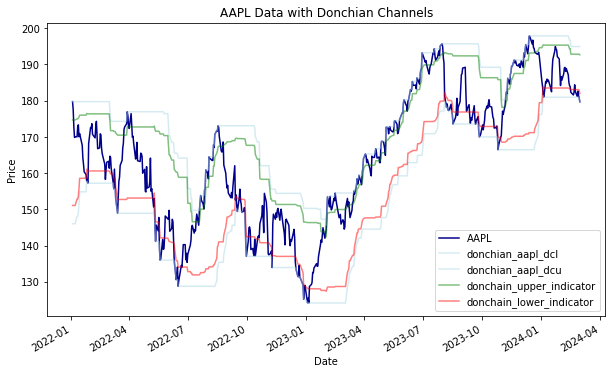

In [34]:
import matplotlib.pyplot as plt

# Plot the graph with customized colors and transparency
aapl_plot = aapl[['AAPL', 'AAPL_dcl', 'AAPL_dcm', 'AAPL_dcu','AAPL_upper_dcu', 'AAPL_lower_dcl']]
#aapl_plot = aapl_plot[aapl_plot.index >= '2022-01-01']
aapl_plot['AAPL'].plot(color='darkblue', figsize=(10, 6), label='AAPL')
aapl_plot['AAPL_dcl'].plot(color = 'lightblue', label = 'donchian_aapl_dcl', alpha = 0.5)
aapl_plot['AAPL_dcu'].plot(color = 'lightblue', label = 'donchian_aapl_dcu', alpha = 0.5)
aapl_plot['AAPL_upper_dcu'].plot(color = 'green', label = 'donchain_upper_indicator', alpha = 0.5)
aapl_plot['AAPL_lower_dcl'].plot(color = 'red', label = 'donchain_lower_indicator',alpha = 0.5)


# Add legend
plt.legend()

# Add title and labels
plt.title('AAPL Data with Donchian Channels')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the plot
plt.show()


przyjrzeć się kilku caseom z bliska i uleprzyć warunki